In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


from sklearn import model_selection, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, lasso_path
from sklearn.metrics import mean_squared_error



In [262]:
hp = pd.read_csv('train.csv')
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [263]:
hp2 = hp.fillna(hp.mean())

/var/folders/_g/ks06ypzd0b77vz99vm0j17940000gn/T/ipykernel_16447/784407834.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hp2 = hp.fillna(hp.mean())


In [264]:
hp2.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [265]:
num_var = hp2.select_dtypes(include=['int64','float64'])
num_var.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [266]:
sc = StandardScaler()
num_var_scaled = sc.fit_transform(num_var)

In [267]:
num_var_scaled

array([[-1.73086488,  0.07337496, -0.22937175, ..., -1.5991111 ,
         0.13877749,  0.34727322],
       [-1.7284922 , -0.87256276,  0.4519361 , ..., -0.48911005,
        -0.61443862,  0.00728832],
       [-1.72611953,  0.07337496, -0.09311018, ...,  0.99089135,
         0.13877749,  0.53615372],
       ...,
       [ 1.72611953,  0.30985939, -0.18395123, ..., -0.48911005,
         1.64520971,  1.07761115],
       [ 1.7284922 , -0.87256276, -0.09311018, ..., -0.8591104 ,
         1.64520971, -0.48852299],
       [ 1.73086488, -0.87256276,  0.22483348, ..., -0.1191097 ,
         0.13877749, -0.42084081]])

In [268]:
num_var.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [269]:
num_var_sc = pd.DataFrame(num_var_scaled, columns =['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'])

In [270]:
num_var_sc

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,1.723747,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,1.726120,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,1.728492,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


In [271]:
#num_var

In [272]:
O_var = pd.get_dummies(hp2.select_dtypes(include='O'))
O_var

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [273]:
mdf = O_var.join(num_var_sc)

In [274]:
mdf

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,0,0,0,1,0,0,1,0,0,0,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0,0,0,1,0,0,1,0,0,1,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,0,0,0,1,0,0,1,0,0,1,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,0,0,0,1,0,0,1,0,0,1,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,0,0,0,1,0,0,1,0,0,0,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,0,0,0,1,0,0,1,0,0,0,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,0,0,0,1,0,0,1,0,0,0,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


In [275]:
mdf.isna().sum()

MSZoning_C (all)    0
MSZoning_FV         0
MSZoning_RH         0
MSZoning_RL         0
MSZoning_RM         0
                   ..
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice           0
Length: 290, dtype: int64

In [276]:
#sc = StandardScaler()
#mdf_scaled = sc.fit_transform(mdf)

In [277]:
#mdf_scaled

In [278]:
target = mdf.SalePrice

In [279]:
target

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice, Length: 1460, dtype: float64

In [280]:
data = mdf.drop(labels='SalePrice',axis=1)

In [281]:
data

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,1,0,0,1,0,0,0,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0,0,0,1,0,0,1,0,0,0,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0,0,0,1,0,0,1,0,0,1,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0,0,0,1,0,0,1,0,0,1,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0,0,0,1,0,0,1,0,0,1,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,0,0,0,1,0,0,1,0,0,0,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0,0,0,1,0,0,1,0,0,0,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,0,0,0,1,0,0,1,0,0,0,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [282]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [283]:
lr = LinearRegression()

In [284]:
lr.fit(X_train,y_train)

LinearRegression()

In [285]:
y_pred = lr.predict(X_test)
y_pred

array([-2.56347656e-01,  2.04052734e+00, -1.15039062e+00, -4.66308594e-02,
        1.74975586e+00, -1.41967773e+00,  7.30468750e-01, -4.26025391e-01,
       -1.48803711e+00, -3.76220703e-01, -5.06835938e-01, -9.85351562e-01,
       -1.33593750e+00,  4.88769531e-01, -1.11572266e-01, -5.94482422e-01,
        5.95703125e-02, -7.00439453e-01, -6.32812500e-01,  4.26513672e-01,
       -4.24316406e-01,  3.19580078e-01, -7.86132812e-02, -6.35253906e-01,
        2.37304688e-01, -5.02685547e-01,  1.57226562e-01, -9.68994141e-01,
       -9.00878906e-02,  2.47802734e-01, -4.23095703e-01,  1.24682617e+00,
        9.41894531e-01, -9.43115234e-01,  7.59521484e-01, -4.00390625e-01,
       -5.47363281e-01,  2.49023438e-01,  1.56860352e+00, -7.62451172e-01,
       -6.15478516e-01,  5.03417969e-01, -9.75830078e-01,  2.41113281e+00,
       -6.44775391e-01, -6.25976562e-01, -1.07250977e+00, -5.04150391e-01,
        3.05761719e+00, -6.75292969e-01, -7.87841797e-01,  6.51855469e-01,
       -1.01953125e+00,  

In [286]:
#lr.coef_

In [287]:
residues = y_pred - y_test
residues

892     0.076349
1105    0.226282
413    -0.320309
522     0.229402
1036    0.055135
          ...   
479     0.880792
1361    0.269862
802    -0.058760
651    -0.246813
722    -0.155753
Name: SalePrice, Length: 292, dtype: float64

In [288]:
lr.score(X_train,y_train)

0.9401055864782535

In [289]:
#list(lr.coef_)

In [290]:
lr.intercept_

2153707108510.6501

In [291]:
def rmse_cv(preds,targets):
    return np.sqrt(((preds-targets)**2).mean())

In [292]:
rmse = rmse_cv(y_pred, y_test)
rmse

3012834161.8927183

In [293]:
cross_val_score(lr,X_train,y_train,cv=5,error_score=rmse).mean()

-1.5220261153606987e+21

In [294]:
cross_val_score(lr,X_test,y_test,cv=5,error_score=a, scoring='neg_mean_squared_error').mean()

-2.1479426966571945e+23

In [295]:
cross_val_score(lr,X_test,y_test,cv=5,scoring='neg_mean_squared_error').mean()

-2.1479426966571945e+23

In [296]:
alphas = (0.01,.05, 0.1,0.3, 0.8, 1, 5, 10, 15, 30 , 50)

In [314]:
ridg_lr = RidgeCV(alphas, scoring='neg_mean_squared_error')
ridg_lr.fit(X_train, y_train)
ridg_lr.score(X_train, y_train)
y_pred_ridg = ridg_lr.predict(X_test)
rmse_cv_ridg = rmse_cv(y_pred_ridg, y_test)
ridg_lr.alpha_
mse_ridg = mean_squared_error(y_pred_ridg, y_test)
rcoef = ridg_lr.coef_
rincpt = ridg_lr.coef_

In [315]:
rmse_cv_ridg 

0.39245360185653777

In [299]:
mse_ridg

0.1540198296101698

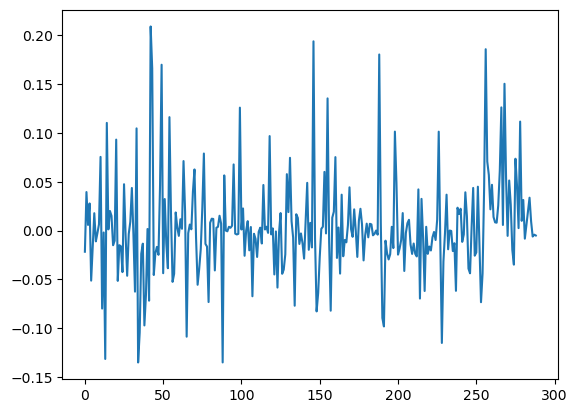

In [300]:
plt.plot(range(len(data.columns)), rcoef)


In [301]:
#lasso
my_alphas=(10, 1, 0.1, 0.1, 0.001, 0.0005)
lasso_r = LassoCV(alphas=my_alphas)
lasso_r.fit(X_train, y_train)

LassoCV(alphas=(10, 1, 0.1, 0.1, 0.001, 0.0005))

In [309]:
lasso_r.alpha_

0.001

In [302]:
y_pred_lasso = lasso_r.predict(X_test)

In [303]:
lcoef = lasso_r.coef_
lasso_r.score(X_train, y_train)
mean_squared_error(y_pred_lasso, y_test)

0.1244766487233998

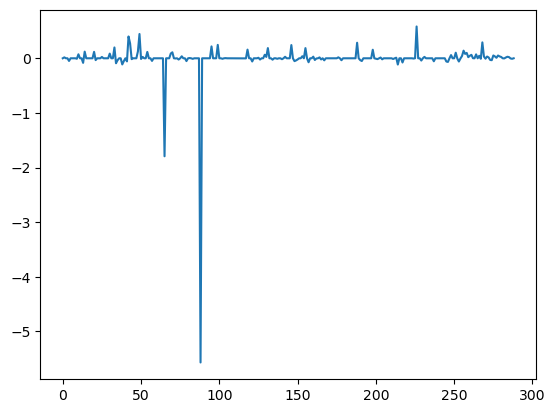

In [304]:
plt.plot(range(len(data.columns)), lcoef)


In [305]:

alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=my_alphas)

coefs_lasso.shape

#only 6 used variables from 290 one!

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8656855424981558, tolerance: 0.11046685641982659
  model = cd_fast.enet_coordinate_descent_gram(


(289, 6)

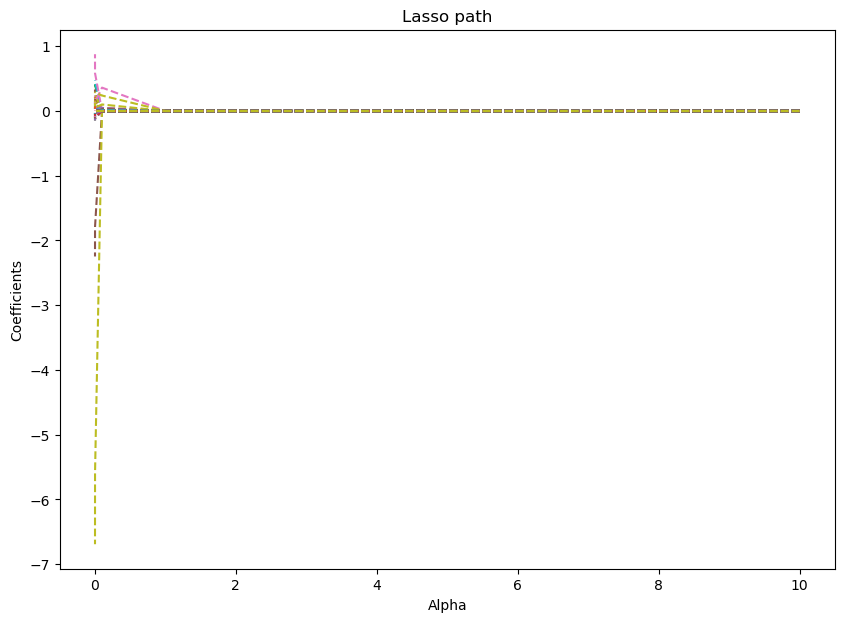

In [306]:
import matplotlib.cm as cm

plt.figure(figsize=(10,7))

for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path, coefs_lasso[i,:], '--')

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()

In [313]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

sk = SelectKBest(f_regression, k = 6)

sk.fit(X = data, y = target)

data.columns[sk.get_support()]

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea'],
      dtype='object')